In [1]:
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy.interpolate import griddata
from models.constants import *
from models.make_model import *
from IPython import display

In [2]:
stellar_params = {'Ms': 1, 'Rs': 1, 'Ts': 6000}
disk_params = {'Mdisk': 0.05, 'Mfrac': [0.01,0.01],'R0':[1,1], 'Rout':[200,200], 'H0':[0.05,0.025], 'p':[-1,-1], 'fi':[0.25,0.25], 'Rdisk':[100,100]}
envelope_params = {'Min': 1.0e-7, 'Rc':120, 'rho_amb':1e-30, 'rho_0': 1e-22,'theta_min': 35,'exf':0.25,'Rmax':5e5, 'd2g': 0.01 }
grid_params = {'N':[300,90,90], 'min':[0.1,1e-2,0], 'max':[400,pi/2.,2*pi], 'spacing':['log','lin','lin']}
dust_params = {'rho_si':3.0, 'amin_chem':0.06, 'amax_ism': 1.0, 'amin': [0.005e-6,0.005e-6,0.005e-6], 
              'amax': [1e-6,1e-6,1e-3]}
RT_params = {'zetacr': 1.3e-17}

In [3]:
d1 = model(stellar_params, disk_params, envelope_params,grid_params,dust_params,RT_params)


directory exists - will overwrite current model if you write to it!


/Users/aleksandra/Desktop/wedgeford/models/make_model.py:164: RuntimeWarning: divide by zero encountered in log10
  contourf(R_CYL[:,:,0],Z_CYL[:,:,0], np.log10(rho[:,:,0]),**plot_params)


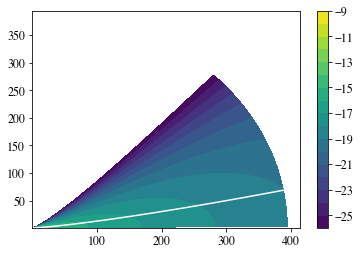

In [4]:
d1.plot_slice(d1.rho_disk(fluid=1),{'levels':np.arange(-26,-8,1)})
plot(d1.r, d1.H(d1.r,fluid=1),color='white')

In [11]:
d1.RT_Tdust()

0

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.bdat


(0.0, 200.0)

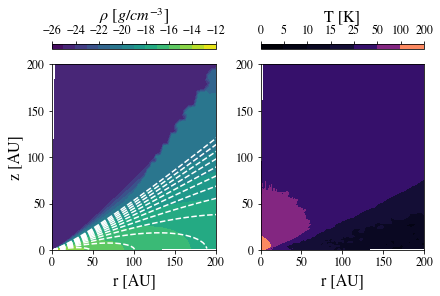

In [12]:

f,ax = d1.plot_RT()
ax[0].set_ylim(0,200)
ax[1].set_ylim(0,200)
ax[0].set_xlim(0,200)
ax[1].set_xlim(0,200)

In [13]:
rpy.image.makeImage(npix=400., wav=2200, incl=0, phi=0., sizeau=400.,noscat=True)
im = rpy.image.readImage(binary=True)


Executing RADMC-3D Command:
radmc3d image npix 400 incl 0 sizeau 400.0 lambda 2200 phi 0.0 pointau 0.0  0.0  0.0 fluxcons noscat


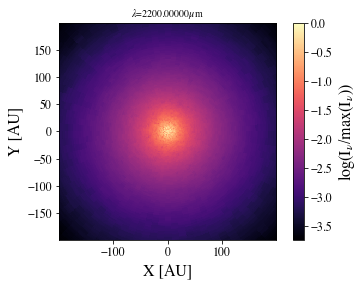

{'implot': <matplotlib.image.AxesImage at 0x7fbba5a692b0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x7fbba5a93a60>}

In [14]:
rpy.image.plotImage(im, au=True, log=True, maxlog=10, saturate=-1, cmap=cm.magma)